In [3]:
# Группа 7
# Домашнее задание 4

# Часть 2_A: находим выбросы статистическими методами
# Скопировано из спринта 2, с некоторыми дополнениями

# Импорты
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

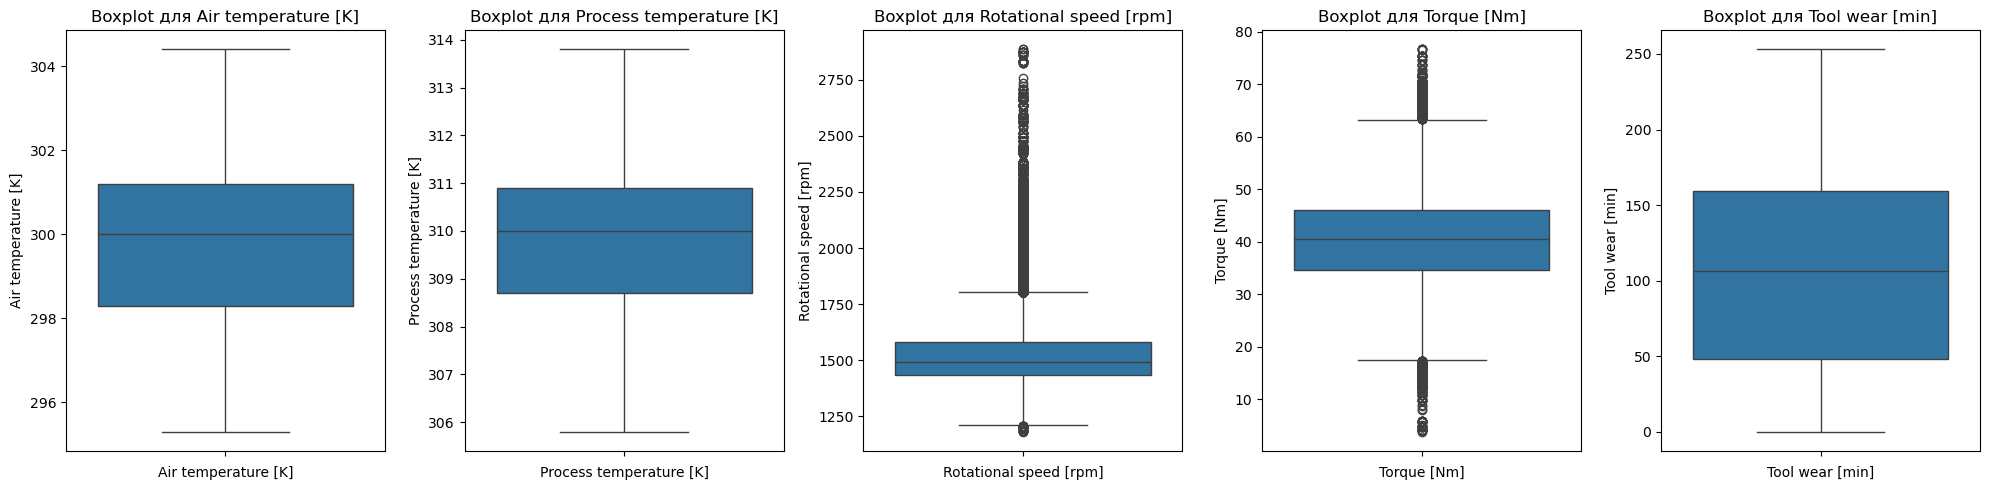

In [7]:
# Загрузка данных
initial_data = pd.read_csv('files/train.csv')

numeric_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Создание сетки графиков
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(20, 5))  # 1 строка, N столбцов

for ax, col in zip(axes, numeric_columns):
    sns.boxplot(initial_data[col], ax=ax)
    ax.set_title(f'Boxplot для {col}')
    ax.set_xlabel(col)

plt.tight_layout()  # Для аккуратного расположения графиков
plt.show()

In [11]:
# Видно, что выбросы есть в переменных Rotational speed [rpm] и Torque [Nm].
# В спринте 2 было показано, что выбросы относятся к обоим классам: отказам и отсутствию отказов
# Также было показано, что строки с выбросами имеют то же распределение, что и весь датасет

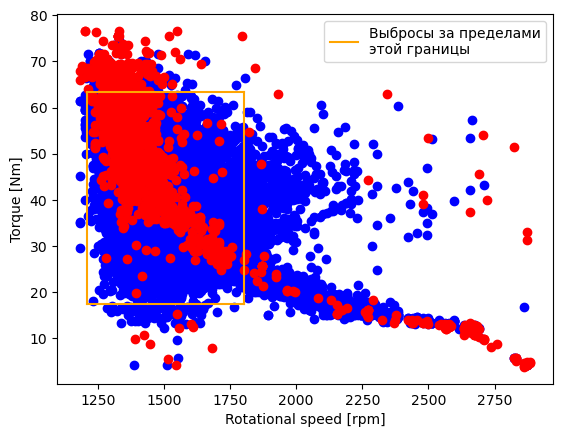

In [63]:
# Построим диаграмму рассеяния:
# По одной оси Rotational speed [rpm], по другой оси Torque [Nm]

data_not_failure = initial_data.loc[initial_data['Machine failure'] == 0]
data_failure = initial_data.loc[initial_data['Machine failure'] == 1]

plt.scatter(data_not_failure['Rotational speed [rpm]'], data_not_failure['Torque [Nm]'], c='blue')
plt.scatter(data_failure['Rotational speed [rpm]'], data_failure['Torque [Nm]'], c='red')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')

# Изобразим границы, значения за пределами которых согласно стат. методам следует считать выбросами

Q1_rotate = initial_data['Rotational speed [rpm]'].quantile(0.25)  # Первый квартиль
Q3_rotate = initial_data['Rotational speed [rpm]'].quantile(0.75)  # Третий квартиль
IQR_rotate = Q3_rotate - Q1_rotate  # Межквартильный размах
lower_bound_x = Q1_rotate - 1.5 * IQR_rotate
upper_bound_x = Q3_rotate + 1.5 * IQR_rotate

Q1_torque = initial_data['Torque [Nm]'].quantile(0.25)  # Первый квартиль
Q3_torque = initial_data['Torque [Nm]'].quantile(0.75)  # Третий квартиль
IQR_torque = Q3_torque - Q1_torque  # Межквартильный размах
lower_bound_y = Q1_torque - 1.5 * IQR_torque
upper_bound_y = Q3_torque + 1.5 * IQR_torque

x1 = np.linspace(lower_bound_x, upper_bound_x, 100)
y1 = np.linspace(lower_bound_y, lower_bound_y, 100)
plt.plot(x1, y1, c='orange')

x2 = np.linspace(lower_bound_x, lower_bound_x, 100)
y2 = np.linspace(lower_bound_y, upper_bound_y, 100)
plt.plot(x2, y2, c='orange')

x3 = np.linspace(lower_bound_x, upper_bound_x, 100)
y3 = np.linspace(upper_bound_y, upper_bound_y, 100)
plt.plot(x3, y3, c='orange')

x4 = np.linspace(upper_bound_x, upper_bound_x, 100)
y4 = np.linspace(lower_bound_y, upper_bound_y, 100)
plt.plot(x4, y4, c='orange', label = 'Выбросы за пределами\nэтой границы')
plt.legend()

In [65]:
# В результате поиска выбросов с помощью статистических методов мы посчитали выбросами всё,
# что находится за пределами самого большого сгустка данных